# (ANALYZING BAY WHEELS BIKE SHARING (2018 QUARTER IV))
## by Ayoade Olayiwola

## Investigation Overview
> In this investigation of the Bay Wheels Bike Sharing System (formerly Ford GoBike System), I set out to examine the characteristics of riders as it relates to trips taking and their use of the bike sharing service. 

## Dataset Overview
> The dataset used contains monthly individual trip data from October 2018 to December 2018 in CSV format covering the greater San Francisco Bay area. Though data exists for every month, I chose to work with data for the last quarter of 2018. When combined this dataset contains 446,956 rows and 16 columns, each row representing an individual's trip records on 16 variables
> The dataset contains information about the trips, the station and the members. 
> The dataset hosted on the site (https://www.lyft.com/bikes/bay-wheels/system-data) has excluded some variable which are important to my investigation. I was howver able to locate a dataset with the missing variable. The project leaves room to source your own dataset

In [1]:
# import all packages and set plots to be embedded inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

# suppress warnings from final output
import warnings
warnings.simplefilter("ignore")

In [2]:
# load in the dataset into a pandas dataframe
# load in the dataset into a pandas dataframe and clean up field dtypes
df = pd.read_csv('clean_dataset.csv')

df['start_time'] = pd.to_datetime(df['start_time'])
df['end_time'] = pd.to_datetime(df['end_time'])

df['start_station_id'] = df['start_station_id'].astype('str')
df['end_station_id'] = df['end_station_id'].astype('str')
df['bike_id'] = df['bike_id'].astype('str')

df['user_type'] = df['user_type'].astype('category')
df['member_gender'] = df['member_gender'].astype('category')

weekday = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']
weekdaycat = pd.api.types.CategoricalDtype(ordered=True, categories=weekday)
df['start_dayofweek'] = df['start_dayofweek'].astype(weekdaycat)

month = ['October', 'November', 'December']
monthcat = pd.api.types.CategoricalDtype(ordered=True, categories=month)
df['start_month'] = df['start_month'].astype(monthcat)

df.info(null_counts=True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 448207 entries, 0 to 448206
Data columns (total 21 columns):
 #   Column                   Non-Null Count   Dtype         
---  ------                   --------------   -----         
 0   duration_sec             448207 non-null  int64         
 1   start_time               448207 non-null  datetime64[ns]
 2   end_time                 448207 non-null  datetime64[ns]
 3   start_station_id         448207 non-null  object        
 4   start_station_name       446225 non-null  object        
 5   start_station_latitude   448207 non-null  float64       
 6   start_station_longitude  448207 non-null  float64       
 7   end_station_id           448207 non-null  object        
 8   end_station_name         446225 non-null  object        
 9   end_station_latitude     448207 non-null  float64       
 10  end_station_longitude    448207 non-null  float64       
 11  bike_id                  448207 non-null  object        
 12  user_type       

> Note that the above cells have been set as "Skip"-type slides. That means
that when the notebook is rendered as http slides, those cells won't show up.

## Monthly Usage of User Types

> 89.6% of the users are subscribers while 10.4% are customers. That means subscribers constitutes the majority of the bike sharing usage in the 4th quarter of 2018. October is the peak for both subscribers and customers in terms of usage. Though usage by subscribers fell from November to December, usage by customers rose slightly in the same period.

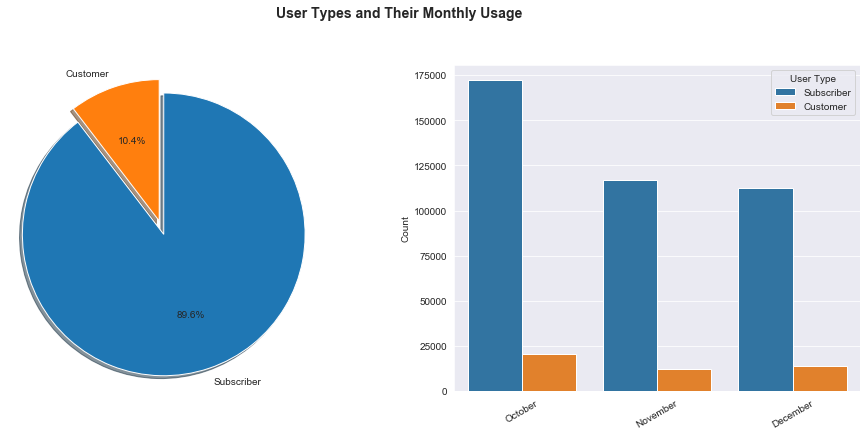

In [3]:
plt.figure(figsize=[16, 6]);
base_color = sns.color_palette('colorblind')[0];
sns.set_style('darkgrid');

plt.subplot(1, 2, 1);
sorted_vals = df.user_type.value_counts()/df.shape[0];
plt.pie(sorted_vals, explode=[0, 0.1], labels=sorted_vals.index, startangle=90, counterclock=False, autopct='%1.1f%%', shadow=True);
plt.axis('square');

plt.subplot(1, 2, 2);
ax = sns.countplot(data=df, x='start_month', hue='user_type', hue_order=sorted_vals.index);
ax.legend(title='User Type');
plt.xticks(rotation=30);
plt.xlabel('');
plt.ylabel('Count');
plt.suptitle('User Types and Their Monthly Usage', fontsize=14, fontweight='semibold', y=1.015);

## Duration of Trips of Users

> Subscribers ride much shorter/quicker trips compared to customers on each day of the week. Both user types maintain a fairly consistent average duration Monday through Friday.

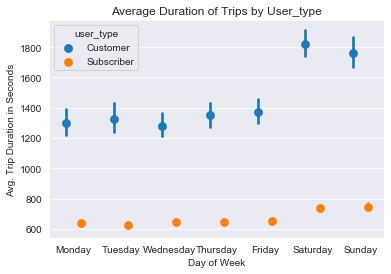

In [4]:
sns.pointplot(data=df, x='start_dayofweek', y='duration_sec', hue='user_type', dodge=0.3, linestyles="");
plt.title('Average Duration of Trips by User_type')
plt.xlabel('Day of Week');
plt.ylabel('Avg. Trip Duration in Seconds');

## Usage by Hours

> Hourly usage peaks at 7am to 9am and 4pm to 6pm. This suggest that the majority of usage is for work commute. We can say that it is also typical of workdays in the United States.

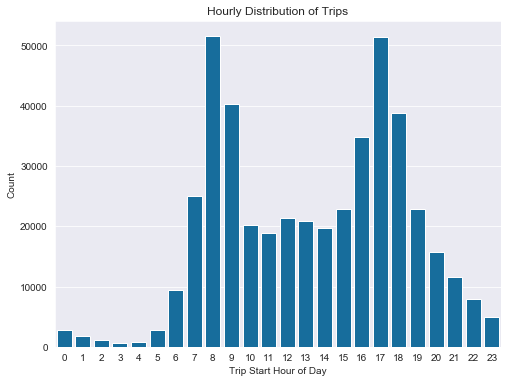

In [5]:
plt.rcParams['figure.figsize'] = 8, 6
base_color = sns.color_palette('colorblind')[0]
sns.set_style('darkgrid')

sns.countplot(data=df, x='start_hourofday', color=base_color);
plt.title('Hourly Distribution of Trips')
plt.xlabel('Trip Start Hour of Day');
plt.ylabel('Count');

## Age of Users
> Users of the service on Monday through to Friday are slightly older than those who ride on weekends. This corresponds to the commute to work usage that was earlier reported.


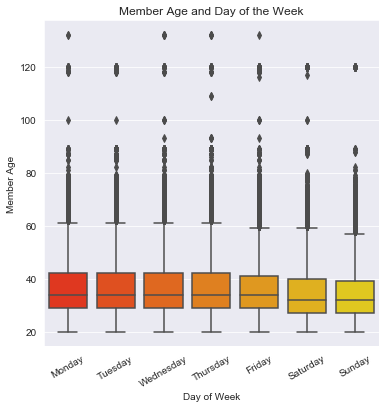

In [6]:
plt.figure(figsize = [6, 6]);

sns.boxplot(data=df, x='start_dayofweek', y='member_age', palette = 'autumn');
plt.xticks(rotation=30);
plt.title('Member Age and Day of the Week')
plt.xlabel('Day of Week');
plt.ylabel('Member Age');

## Summary

> There was a lot more subscribers using the bike sharing system than (casual) customers overall

> Both categories use the service the most in October of the quarter examined. 

> The predominant usage of the service is for work commute; this is validated on many grounds. Different usage patterns and riding habits are observed between the two types of riders. More usage is seen generally on weekdays than on weekends; 

> Subscribers tend to have much shorter/quicker trips compared to customers which makes subscriber usage more efficient.

> Users of the service on Monday through to Friday are slightly older than those who ride on weekends. Usage of the service is seen to decline with age